In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
# Load .txt file (adjust sep if needed: ',' for CSV, '\t' for tab, '|' for pipe)
df = pd.read_csv('../data/MachineLearningRating_v3.txt', sep='|')


C:\Users\Simbo\AppData\Local\Temp\ipykernel_11996\700708480.py:7: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.txt', sep='|')


In [9]:
# 1. Descriptive Stats
numerical_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']
print("Descriptive Stats:")
print(df[numerical_cols].describe())
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

Descriptive Stats:
       TotalPremium   TotalClaims  CustomValueEstimate
count  1.000098e+06  1.000098e+06         2.204560e+05
mean   6.190550e+01  6.486119e+01         2.255311e+05
std    2.302845e+02  2.384075e+03         5.645157e+05
min   -7.825768e+02 -1.200241e+04         2.000000e+04
25%    0.000000e+00  0.000000e+00         1.350000e+05
50%    2.178333e+00  0.000000e+00         2.200000e+05
75%    2.192982e+01  0.000000e+00         2.800000e+05
max    6.528260e+04  3.930921e+05         2.655000e+07

Data Types:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Provi

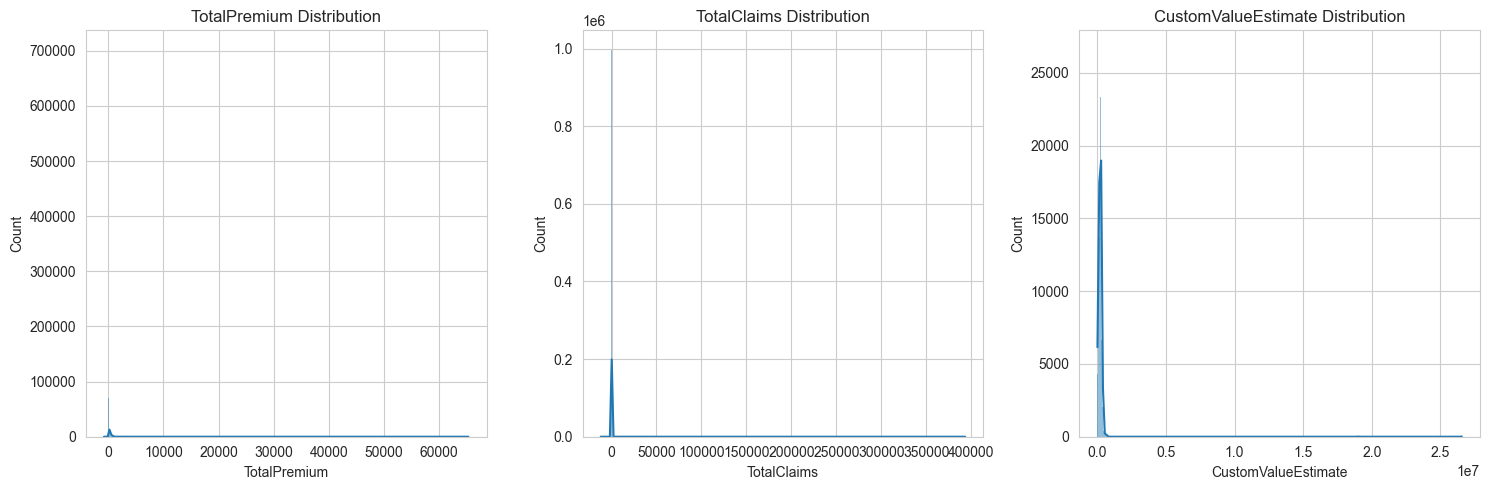

In [10]:
# 2. Univariate Analysis
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.savefig('../docs/histograms.png')
plt.show()

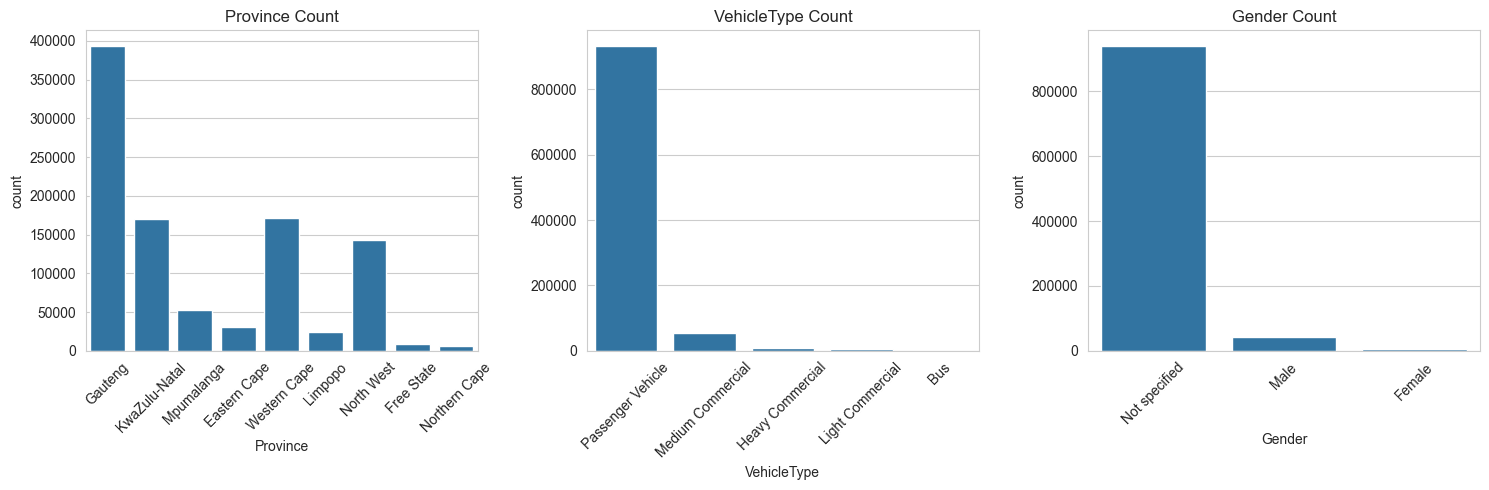

In [11]:
# 3. Categorical Counts
categorical_cols = ['Province', 'VehicleType', 'Gender']
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'{col} Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../docs/bar_charts.png')
plt.show()

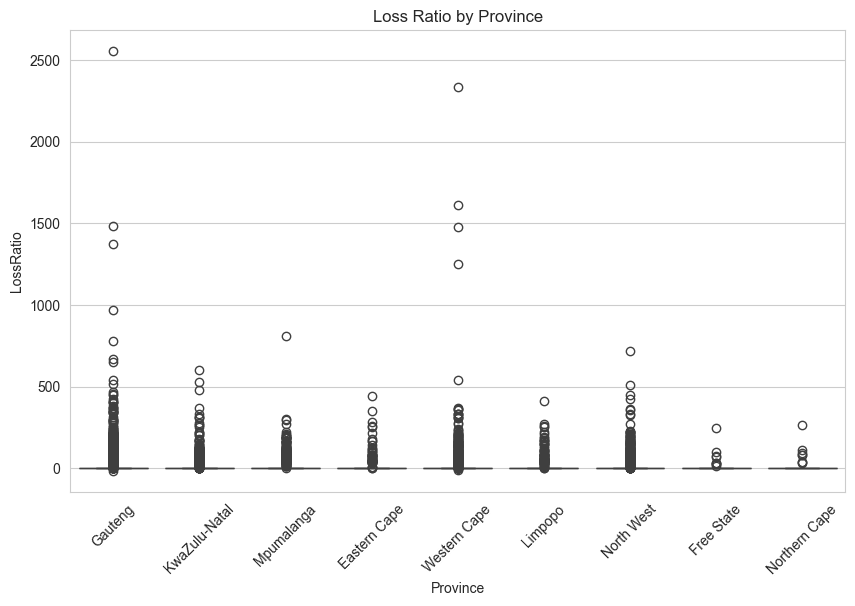

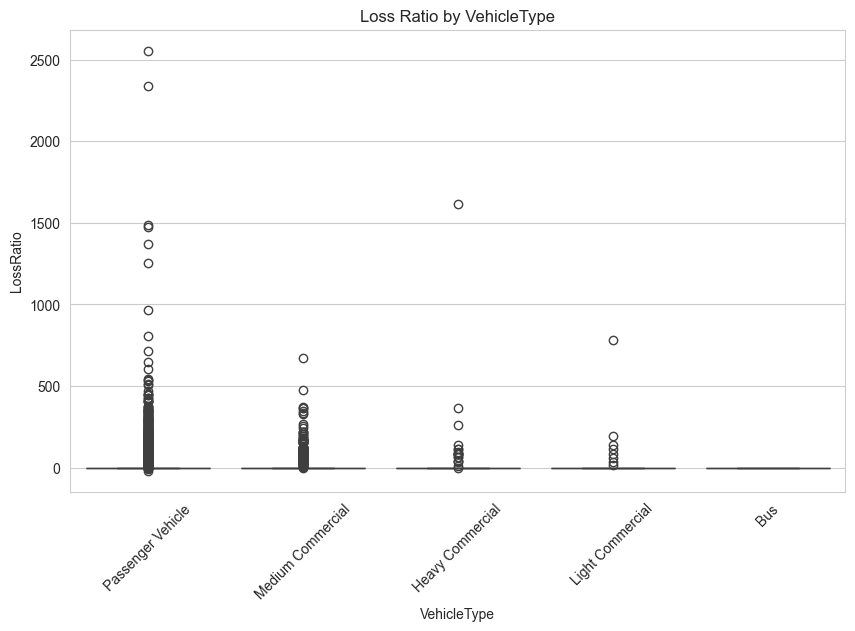

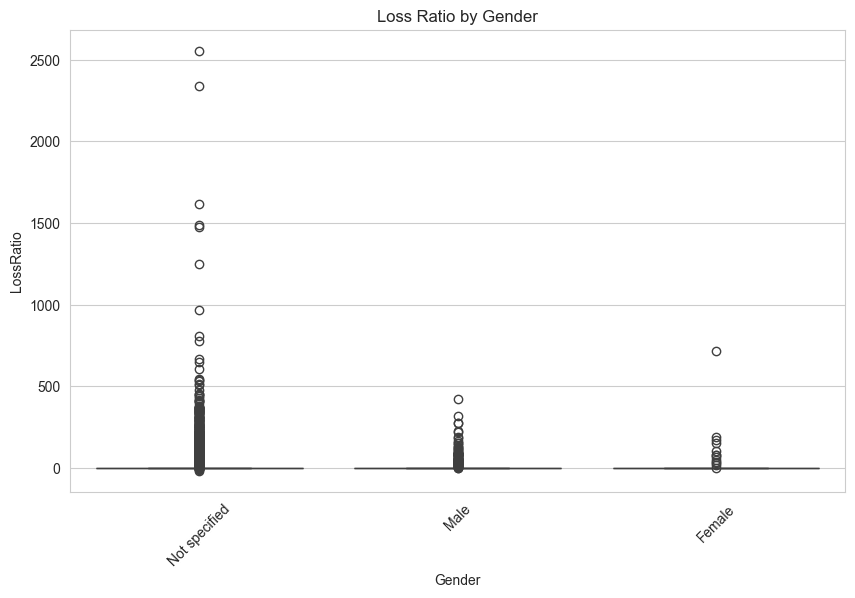

In [12]:
# 4. Loss Ratio Analysis
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=col, y='LossRatio')
    plt.title(f'Loss Ratio by {col}')
    plt.xticks(rotation=45)
    plt.savefig(f'../docs/loss_ratio_{col.lower()}.png')
    plt.show()

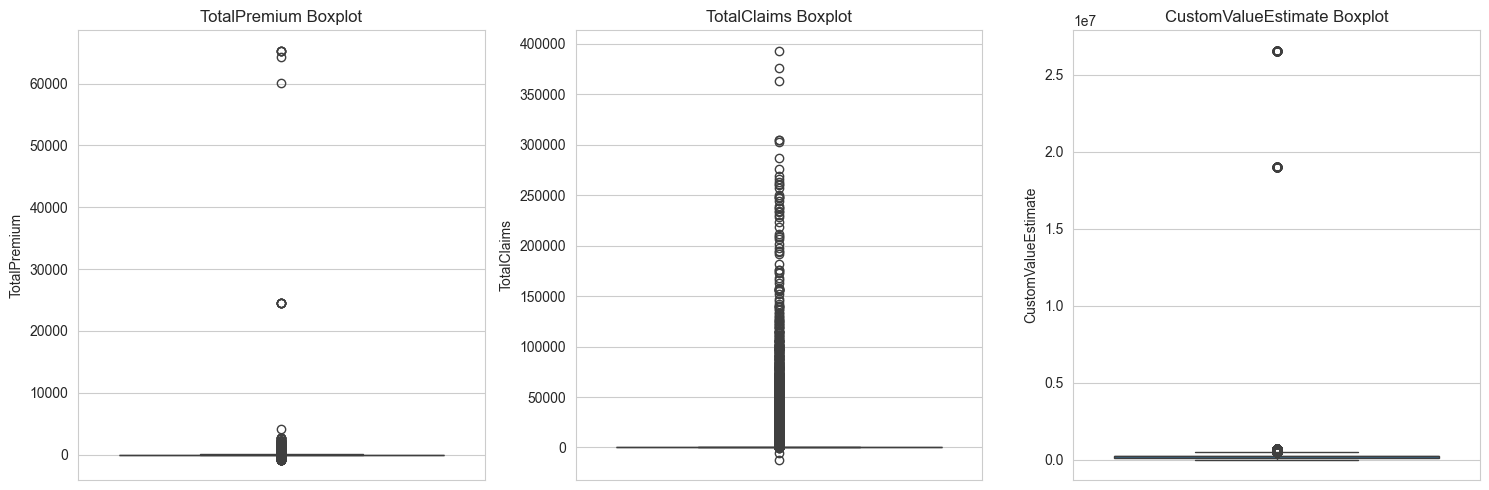

In [13]:
# 5. Outliers
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.savefig('../docs/boxplots.png')
plt.show()

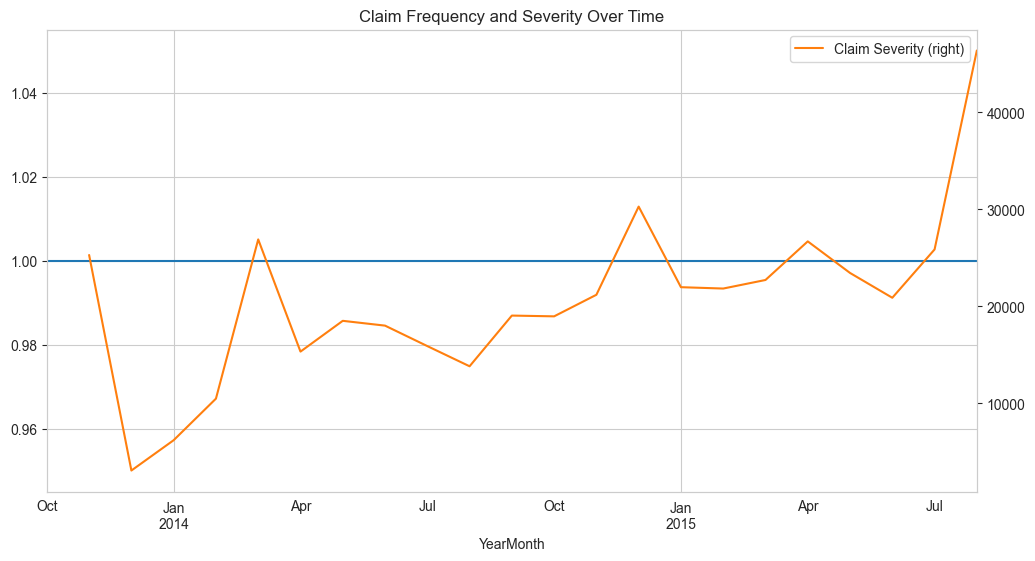

In [14]:
# 6. Temporal Trends
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
df['YearMonth'] = df['TransactionMonth'].dt.to_period('M')
claim_freq = df.groupby('YearMonth')['TotalClaims'].count() / df.groupby('YearMonth').size()
claim_severity = df[df['TotalClaims'] > 0].groupby('YearMonth')['TotalClaims'].mean()
plt.figure(figsize=(12, 6))
claim_freq.plot(label='Claim Frequency')
claim_severity.plot(secondary_y=True, label='Claim Severity')
plt.title('Claim Frequency and Severity Over Time')
plt.legend()
plt.savefig('../docs/temporal_trends.png')
plt.show()


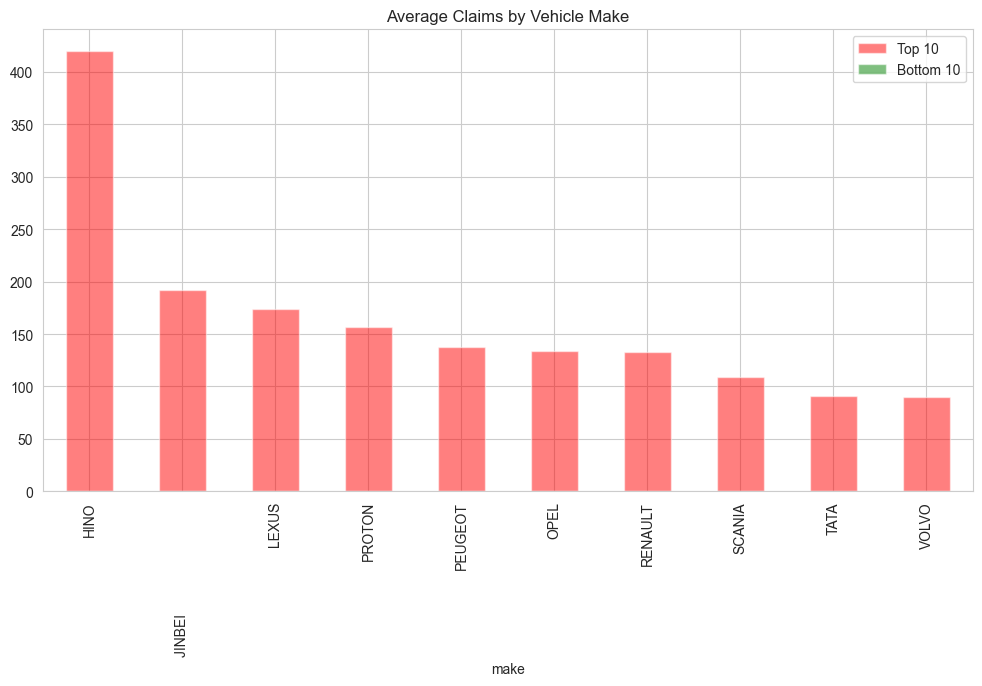

In [15]:

# 7. Claims by Make
claims_by_make = df.groupby('make')['TotalClaims'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
claims_by_make.head(10).plot(kind='bar', color='red', alpha=0.5, label='Top 10')
claims_by_make.tail(10).plot(kind='bar', color='green', alpha=0.5, label='Bottom 10')
plt.title('Average Claims by Vehicle Make')
plt.legend()
plt.savefig('../docs/claims_by_make.png')
plt.show()